<a href="https://colab.research.google.com/github/NataSamo/Python-ML/blob/main/MyTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
class MyBagging:
    def __init__(self, n_estimators=10):
        self.n_estimators = n_estimators
        self.models = [DecisionTreeClassifier() for _ in range(n_estimators)]
        self.bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=n_estimators)

    def fit(self, X, y):
        self.bagging.fit(X, y)

    def predict(self, X):
        return self.bagging.predict(X)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
files.upload()
penguins = pd.read_csv('penguins1.csv')
penguins.head()

Saving penguins1.csv to penguins1.csv


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,36.7,19.3,193,3450,female
4,Adelie,Torgersen,39.3,20.6,190,3650,male


In [ ]:
species = penguins['species'].squeeze()
penguins = penguins.drop(['species'], axis = 1)
P_train, P_test, s_train, s_test = train_test_split(penguins, species, test_size=0.3, random_state=57)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler_mm = MinMaxScaler()

In [ ]:
P_train[['mmLen', 'mmDep', 'mmMass', 'mmFlipper']] = scaler_mm.fit_transform(P_train[['bill_length_mm', 'bill_depth_mm', 'body_mass_g', 'flipper_length_mm']])
P_train.drop(columns=['bill_length_mm', 'bill_depth_mm', 'body_mass_g', 'flipper_length_mm'], inplace=True)
P_test[['mmLen', 'mmDep', 'mmMass', 'mmFlipper']] = scaler_mm.fit_transform(P_test[['bill_length_mm', 'bill_depth_mm', 'body_mass_g', 'flipper_length_mm']])
P_test.drop(columns=['bill_length_mm', 'bill_depth_mm', 'body_mass_g', 'flipper_length_mm'], inplace=True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
s_train = le.fit_transform(s_train)
s_test = le.transform(s_test)

In [ ]:
enc = OneHotEncoder()
res = enc.fit_transform(P_train[['island']])
enc.categories_
res.toarray()
P_train[enc.categories_[0]] = res.toarray()
P_train.drop(columns=['island'], inplace=True)
res = enc.transform(P_test[['island']])
enc.categories_
res.toarray()
P_test[enc.categories_[0]] = res.toarray()
P_test.drop(columns=['island'], inplace=True)

In [ ]:
res = enc.fit_transform(P_train[['sex']])
enc.categories_
res.toarray()
P_train[enc.categories_[0]] = res.toarray()
P_train.drop(columns=['sex'], inplace=True)
res = enc.transform(P_test[['sex']])
enc.categories_
res.toarray()
P_test[enc.categories_[0]] = res.toarray()
P_test.drop(columns=['sex'], inplace=True)

In [ ]:
bagging_model = MyBagging(n_estimators=10)

In [ ]:
bagging_model.fit(P_train, s_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
y_pred = bagging_model.predict(P_test)

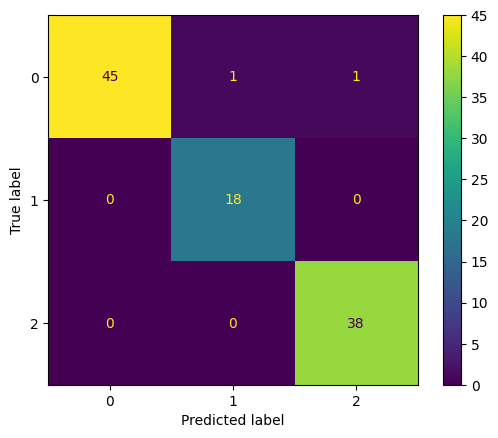

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = bagging_model.predict(P_test)
ConfusionMatrixDisplay.from_predictions(s_test, y_pred);

In [ ]:
accuracy = accuracy_score(s_test, y_pred)
accuracy

0.9805825242718447